# ROC Curve - Decision Trees for Fake News

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Locate and load the data file
df_fake = pd.read_csv("./EP_datasets/Fake.csv")
df_true = pd.read_csv("./EP_datasets/True.csv")

In [2]:
# Apply pre-processing
df_true["class"] = 0
df_fake["class"] = 1
df = pd.concat([df_fake, df_true])
X = TfidfVectorizer(stop_words="english", max_features=40).fit_transform(df["title"])
y = df.loc[:, df.columns == "class"].values

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)


# Display OP
def annot(opi, x, y):
    plt.annotate(
        f"OP{opi}",
        xy=(x, y),
        xytext=(0.90 * x + 0.1, 0.80 * y),
        arrowprops=dict(facecolor="lightgray", shrink=1),
    )

Test Acc           C    TPR    FPR
   0.713     3.00000  0.457  0.005
   0.731     4.00000  0.492  0.006
   0.731     5.00000  0.492  0.006
   0.742     6.00000  0.514  0.006
   0.742     7.00000  0.514  0.007
   0.761     8.00000  0.572  0.031
   0.767     9.00000  0.581  0.029
   0.771    10.00000  0.590  0.030
   0.775    11.00000  0.601  0.032
   0.783    12.00000  0.615  0.033


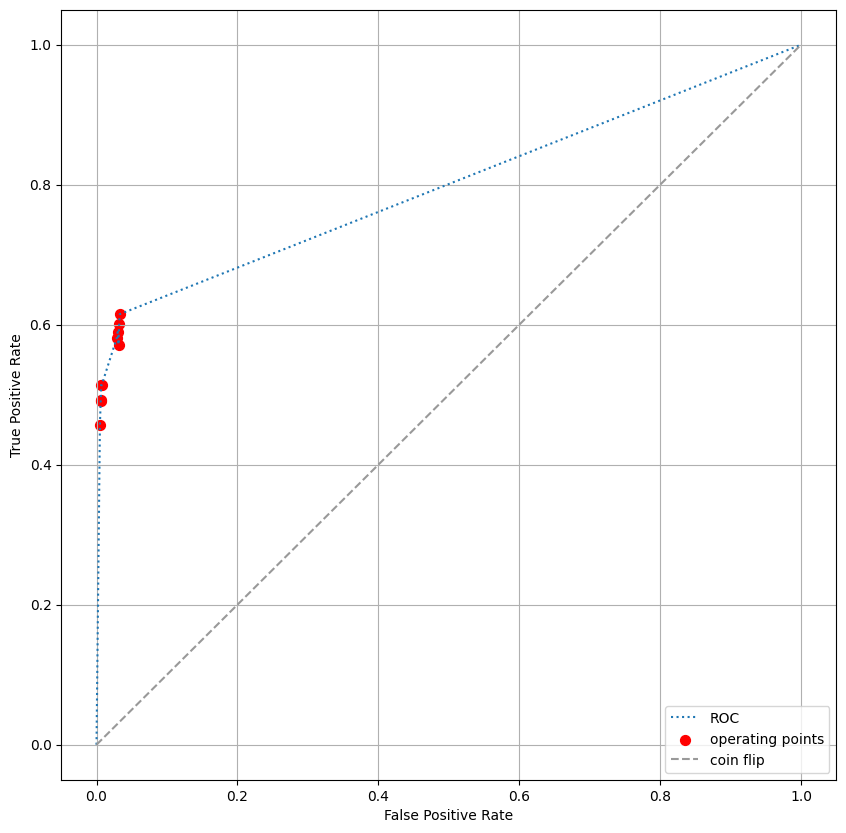

In [4]:
# Parameter to vary for decision tree
C = (3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

# Let's vary C and generate training/testing sessions to collect data for ROC
# Decision Tree using Gini impurity and no restraint on max features
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_tree = make_pipeline(
        StandardScaler(with_mean=False),
        DecisionTreeClassifier(criterion="gini", max_depth=c, random_state=1),
    )

    pipe_tree.fit(X_train, y_train)
    y_pred = pipe_tree.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_tree.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.583     3.00000  0.985  0.861
   0.591     4.00000  0.223  0.005
   0.601     5.00000  0.244  0.006
   0.644     6.00000  0.526  0.225
   0.656     7.00000  0.548  0.225
   0.668     8.00000  0.474  0.119
   0.753     9.00000  0.540  0.012
   0.763    10.00000  0.578  0.033
   0.772    11.00000  0.594  0.033
   0.773    12.00000  0.597  0.033


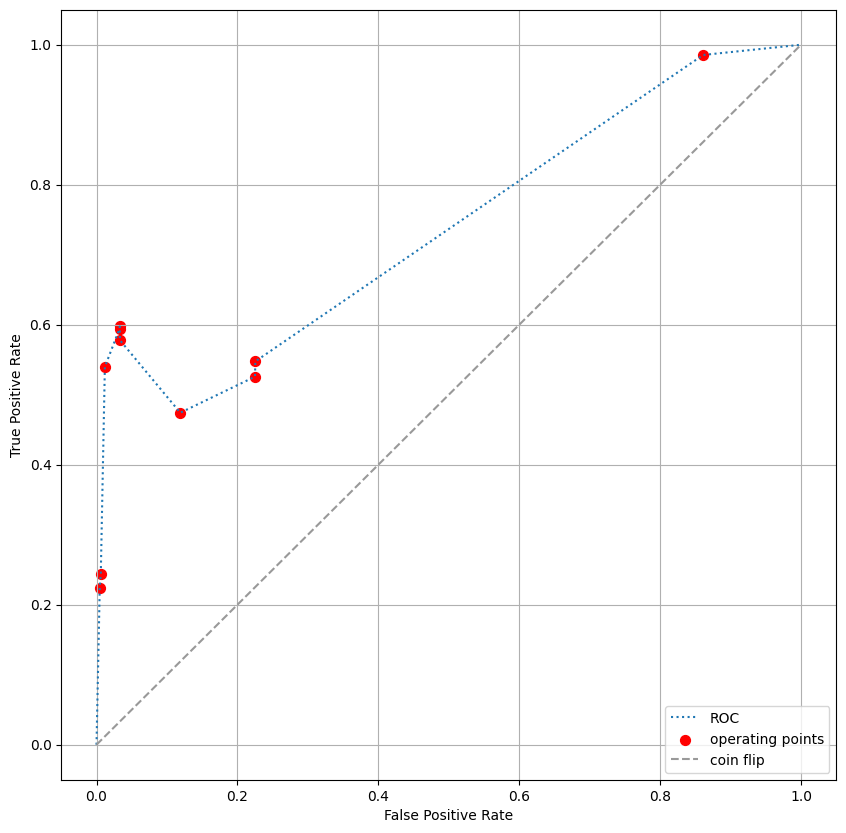

In [5]:
# Parameter to vary for decision tree
C = (3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')

# Decision Tree using Gini impurity and max features of 20
FPR, TPR = [], []
for c in C:
    pipe_tree = make_pipeline(
        StandardScaler(with_mean=False),
        DecisionTreeClassifier(
            criterion="gini", max_depth=c, max_features=20, random_state=1
        ),
    )

    pipe_tree.fit(X_train, y_train)
    y_pred = pipe_tree.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_tree.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig2, ax2 = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.757    20.00000  0.544  0.009
   0.769    30.00000  0.574  0.016
   0.755    40.00000  0.715  0.200
   0.758    50.00000  0.725  0.205
   0.766    60.00000  0.731  0.197
   0.762    70.00000  0.734  0.206
   0.764    80.00000  0.732  0.200
   0.751    90.00000  0.693  0.186
   0.747   100.00000  0.683  0.183


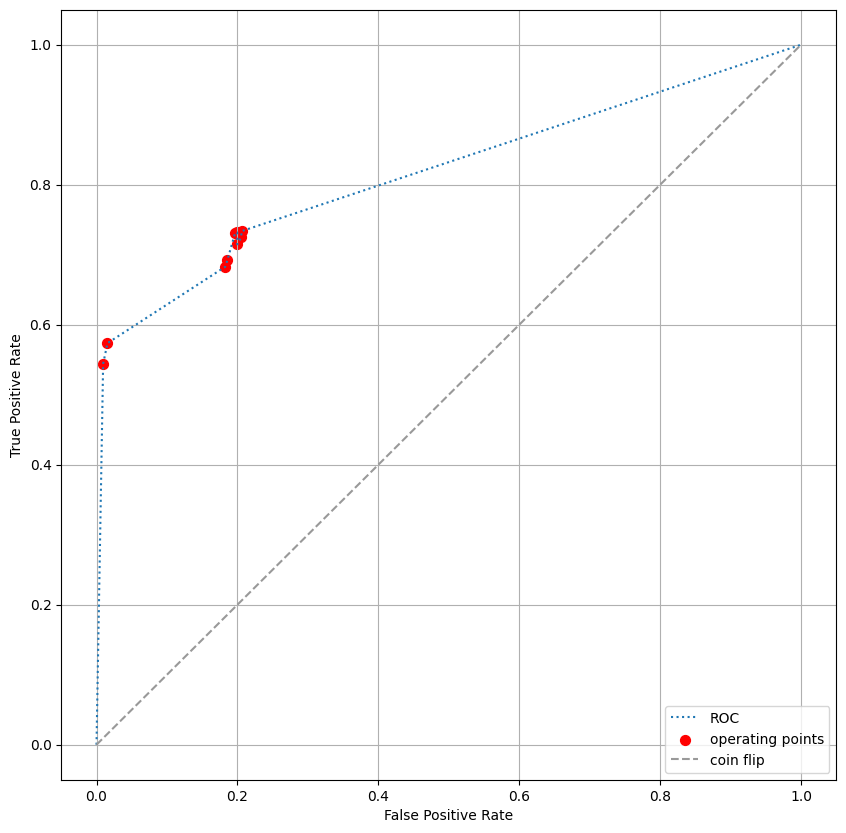

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Parameter to vary for Random Forest with max depth 2
C = (20, 30, 40, 50, 60, 70, 80, 90, 100)
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')

# Random Forest with depth 2
FPR, TPR = [], []
for c in C:
    pipe_forest = make_pipeline(
        StandardScaler(with_mean=False),
        RandomForestClassifier(
            criterion="gini",
            n_estimators=c,
            max_depth=2,
            min_samples_split=2,
            random_state=1,
        ),
    )

    pipe_forest.fit(X_train, y_train.ravel())
    y_pred = pipe_forest.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_forest.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.768    20.00000  0.572  0.015
   0.773    30.00000  0.585  0.020
   0.784    40.00000  0.619  0.034
   0.784    50.00000  0.617  0.033
   0.777    60.00000  0.593  0.021
   0.775    70.00000  0.605  0.037
   0.771    80.00000  0.579  0.018
   0.774    90.00000  0.586  0.018
   0.770   100.00000  0.576  0.017


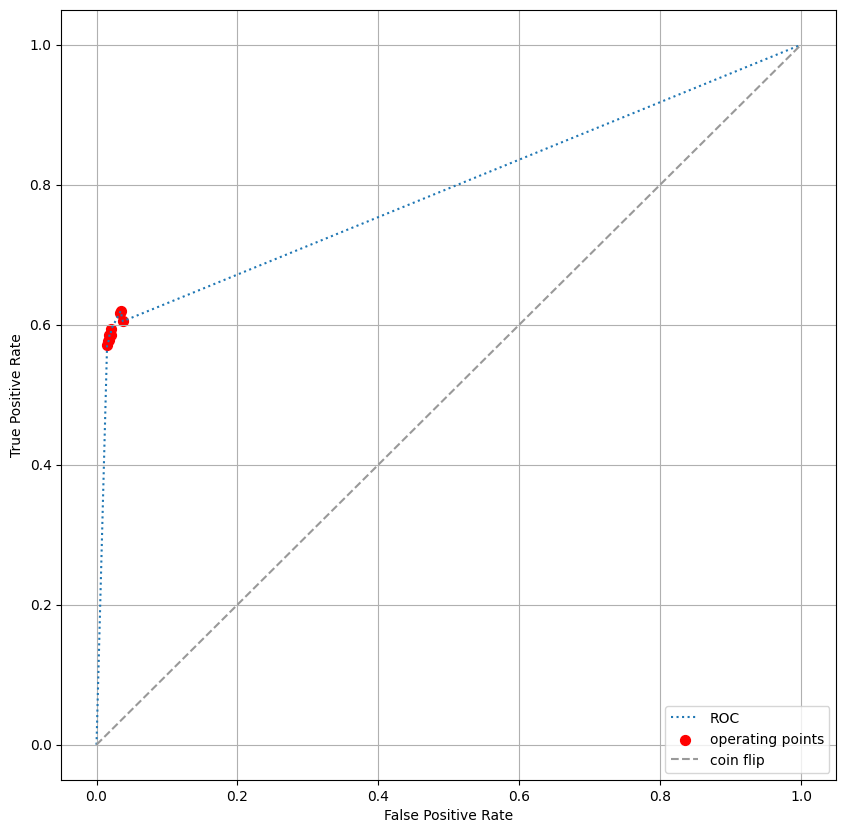

In [7]:
# Parameter to vary for Random Forest with max depth 5
C = (20, 30, 40, 50, 60, 70, 80, 90, 100)
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')

# Random Forest with depth 5
FPR, TPR = [], []
for c in C:
    pipe_forest = make_pipeline(
        StandardScaler(with_mean=False),
        RandomForestClassifier(
            criterion="gini",
            n_estimators=c,
            max_depth=5,
            min_samples_split=2,
            random_state=1,
        ),
    )

    pipe_forest.fit(X_train, y_train.ravel())
    y_pred = pipe_forest.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_forest.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.765     1.00000  0.762  0.231

c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



   0.760     2.00000  0.714  0.189


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.779     3.00000  0.754  0.194
   0.702     4.00000  0.899  0.514


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.775     5.00000  0.735  0.181
   0.786     6.00000  0.755  0.180


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.797     7.00000  0.677  0.071
   0.802     8.00000  0.674  0.057


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.801     9.00000  0.677  0.063
   0.801    10.00000  0.679  0.064


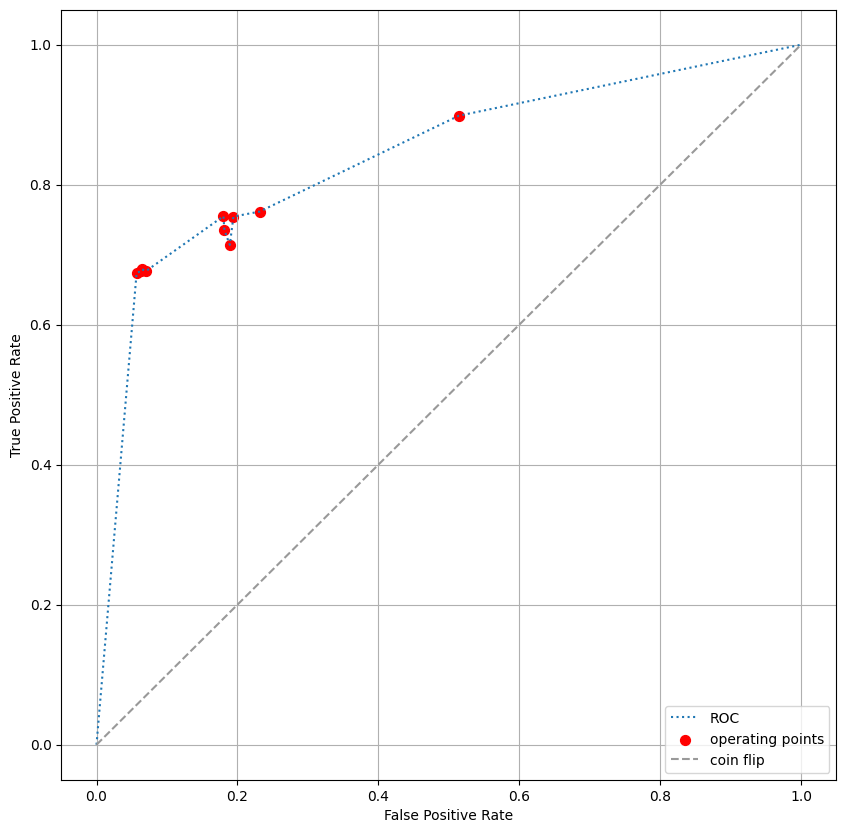

In [8]:
from sklearn.neural_network import MLPClassifier

# Parameter to vary for MLP
C = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')

# Decision Tree using entropy
FPR, TPR = [], []
for c in C:
    pipe_MLP = make_pipeline(
        StandardScaler(with_mean=False),
        MLPClassifier(
            random_state=1,
            hidden_layer_sizes=c,
            activation="relu",
            learning_rate="constant",
            max_iter=20,
        ),
    )

    pipe_MLP.fit(X_train, y_train.ravel())
    y_pred = pipe_MLP.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_MLP.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Test Acc           C    TPR    FPR


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.785     1.00000  0.753  0.180


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.779     2.00000  0.744  0.183


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.789     3.00000  0.753  0.171


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.782     4.00000  0.760  0.194


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.787     5.00000  0.747  0.170


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.802     6.00000  0.682  0.066


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.803     7.00000  0.674  0.055


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.804     8.00000  0.679  0.058


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.801     9.00000  0.683  0.069
   0.803    10.00000  0.683  0.066


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


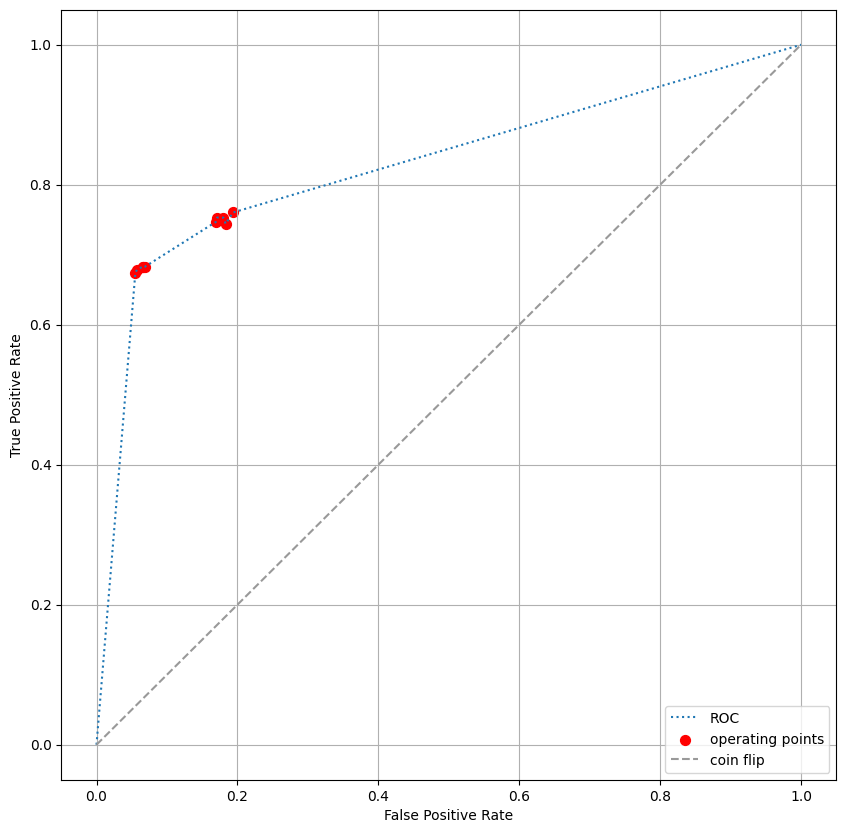

In [9]:
# Parameter to vary for MLP
C = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')

# Decision Tree using entropy
FPR, TPR = [], []
for c in C:
    pipe_MLP = make_pipeline(
        StandardScaler(with_mean=False),
        MLPClassifier(
            random_state=1,
            hidden_layer_sizes=c,
            activation="relu",
            learning_rate="invscaling",
            max_iter=30,
        ),
    )

    pipe_MLP.fit(X_train, y_train.ravel())
    y_pred = pipe_MLP.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_MLP.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")


# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Test Acc           C    TPR    FPR
   0.806     1.00000  0.675  0.051
   0.804     2.00000  0.681  0.061
   0.805     3.00000  0.685  0.064
   0.803     4.00000  0.682  0.065
   0.804     5.00000  0.680  0.059
   0.802     6.00000  0.686  0.071
   0.803     7.00000  0.685  0.067
   0.802     8.00000  0.682  0.065
   0.803     9.00000  0.682  0.063
   0.802    10.00000  0.689  0.073


c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


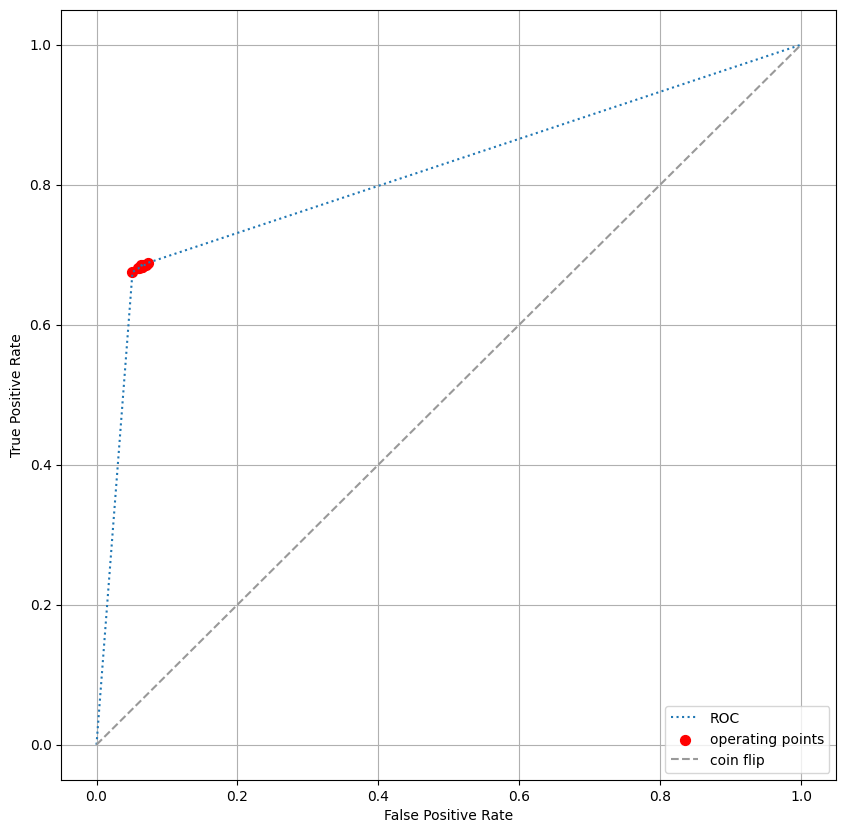

In [10]:
# Parameter to vary for MLP
C = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')

# Decision Tree using entropy
FPR, TPR = [], []
for c in C:
    pipe_MLP = make_pipeline(
        StandardScaler(with_mean=False),
        MLPClassifier(
            random_state=1,
            hidden_layer_sizes=c,
            activation="relu",
            learning_rate="invscaling",
            max_iter=300,
        ),
    )

    pipe_MLP.fit(X_train, y_train.ravel())
    y_pred = pipe_MLP.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_MLP.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")


# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The expected behavior of a ROC plot is that when Pd increases, Pf also increases. The goal is to minimize the increase of Pf while maximizing the increase of Pd. The plots above do show this behavior but some of the plots have a smoother curve than others. The setup of the classifier really makes a difference in how good the results are.

In my opinion, news needs to be accurate and labeling true stories as false is also counterproductive. All of the methods provide similar results but the one with the best results is the binary tree with a depth of 12 with no limit on max features. It provides a reasonable ability to detect fake news with a minimal mislabeling of true news. With ~60% true positives and ~3% false positives it has acceptable results.

It's interesting to see that the model provides almost 100% accuracy with minimal classifier complexity. Even at a depth of 3 the binary tree has incredible performance. That is because there is more variety in the features available in the text than in the titles of the articles since there is more data to extract them from. 

Test Acc           C    TPR    FPR
   0.991     3.00000  0.988  0.004
   0.991     4.00000  0.988  0.006
   0.990     5.00000  0.986  0.004
   0.989     6.00000  0.986  0.007
   0.989     7.00000  0.986  0.007
   0.989     8.00000  0.986  0.008
   0.989     9.00000  0.987  0.009
   0.988    10.00000  0.987  0.011
   0.987    11.00000  0.987  0.012
   0.986    12.00000  0.987  0.015


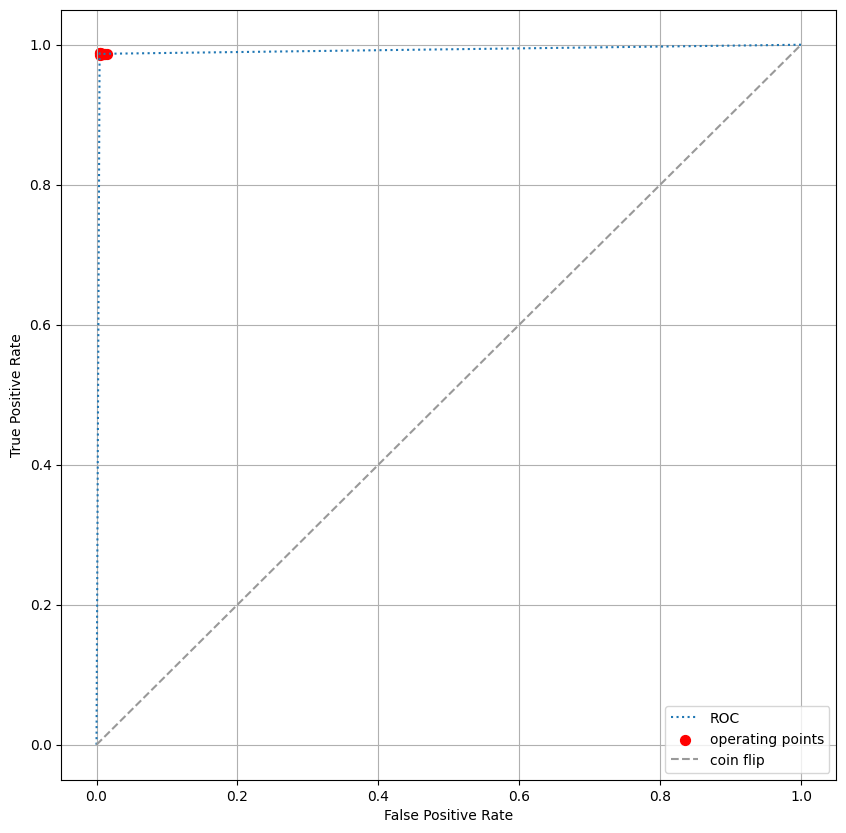

In [11]:
X = TfidfVectorizer(stop_words="english", max_features=40).fit_transform(df["text"])
y = df.loc[:, df.columns == "class"].values

# Training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)


# Display OP
def annot(opi, x, y):
    plt.annotate(
        f"OP{opi}",
        xy=(x, y),
        xytext=(0.90 * x + 0.1, 0.80 * y),
        arrowprops=dict(facecolor="lightgray", shrink=1),
    )


# Parameter to vary for decision tree
C = (3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

# Let's vary C and generate training/testing sessions to collect data for ROC
# Decision Tree using Gini impurity and no restraint on max features
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_tree = make_pipeline(
        StandardScaler(with_mean=False),
        DecisionTreeClassifier(criterion="gini", max_depth=c, random_state=1),
    )

    pipe_tree.fit(X_train, y_train)
    y_pred = pipe_tree.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp / (tp + fn)]  # Pd
    FPR += [fp / (fp + tn)]  # Pf

    print(
        f"{pipe_tree.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}"
    )

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.0] + list(FPR) + [1.0]
tpr = [0.0] + list(TPR) + [1.0]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, ":", label="ROC")
plt.scatter(FPR, TPR, 50, color="red", marker="o", label="operating points")
plt.plot([0, 1], [0, 1], linestyle="--", color=(0.6, 0.6, 0.6), label="coin flip")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()